In [1]:
#necessary libraries 

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

After getting all the necessary data with Spotify API, framing and labelling ('Spotify API.ipynb' notebook), we can import csv file 

In [2]:
#import dataset created in other jupyter notebook
data = pd.read_csv('../data/my_data.csv')

In [3]:
#check the file: id, title, atist, features, labels (dependent variable)
data

id                             title  \
0     0TLAptKgYxe7F0KewWH6X6              I Need A Forest Fire   
1     2y0rHDTckWQ7of6tI1yc82                        Naked Life   
2     5nVE45ithgyVocZp5XLAk6                 The Bug Collector   
3     66VuLX5s1nrZzzQqJqPbri                        Simply Are   
4     0X61Ud5Uzv44RvY3s1SsuO                            Imogen   
...                      ...                               ...   
2672  3485UyMhs2ZF50l9sIZEys                            FINAIS   
2673  7szuecWAPwGoV1e5vGu8tl                      In Your Eyes   
2674  4Ty4XfOHdUFIXmVtBIFMIG                             XPIDI   
2675  1xQ6trAsedVPCdbtDAmk0c  Savage Love (Laxed - Siren Beat)   
2676  1fobXPCu47gikLMIoyQBLy                         Tranquilo   

            main_artist  danceability  energy  key  loudness  mode  \
0              Bon Iver         0.293   0.290    2   -11.596     1   
1            Oko Ebombo         0.624   0.321    0    -9.776     1   
2     Haley Heynderickx         0.538   0.419   10    -9.705     1   
3          Arto Lindsay         0.682   0.694    7   -11.393     0   
4           Nick Mulvey         0.493   0.584    5    -6.894     1   
...                 ...           ...     ...  ...       ...   ...   
2672        benji price         0.750   0.615   11    -7.532     0   
2673         The Weeknd         0.667   0.719    7    -5.371     0   
2674        benji price         0.840   0.475    5    -6.665     0   
2675       Jason Derulo         0.767   0.481    0    -8.520     0   
2676             Aragão         0.770   0.546   10    -8.113     0   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0          0.69600          0.875000    0.1000   0.0373  128.276       257220   
1          0.46300          0.056000    0.1030   0.3040   73.996       255030   
2          0.77700          0.329000    0.0967   0.5290   99.622       228460   
3          0.28900          0.714000    0.0961   0.9540  173.851       224107   
4          0.85000          0.000353    0.1140   0.2340   86.909       255533   
...            ...               ...       ...      ...      ...          ...   
2672       0.64200          0.000000    0.2380   0.8330   75.986       207749   
2673       0.00285          0.000081    0.0736   0.7170  100.021       237520   
2674       0.64100          0.000000    0.0983   0.8820   77.006       172064   
2675       0.23400          0.000000    0.2690   0.7610  150.076       171375   
2676       0.62900          0.006100    0.0938   0.3820   98.032       263131   

      time_signature  Like  
0                  4     1  
1                  4     1  
2                  4     1  
3                  4     1  
4                  4     1  
...              ...   ...  
2672               4     0  
2673               4     0  
2674               4     0  
2675               4     0  
2676               4     0  

[2677 rows x 16 columns]

In [4]:
data =  data.dropna()

In [5]:
data['Like'].unique()

array([1, 0])

In [6]:
data.columns

Index(['id', 'title', 'main_artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Like'],
      dtype='object')

# Exploratory Data Analysis

In [7]:
corr = data.corr()
corr

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.069449  0.011599  0.284325 -0.116292   
energy                0.069449  1.000000  0.008971  0.740162 -0.050924   
key                   0.011599  0.008971  1.000000 -0.026078 -0.128468   
loudness              0.284325  0.740162 -0.026078  1.000000 -0.071169   
mode                 -0.116292 -0.050924 -0.128468 -0.071169  1.000000   
acousticness         -0.082151 -0.734904 -0.004972 -0.546401  0.060198   
instrumentalness     -0.151598 -0.178727  0.017704 -0.374960 -0.011266   
liveness             -0.082333  0.172567 -0.012319  0.076118 -0.001082   
valence               0.524706  0.392466  0.012256  0.393062 -0.052375   
tempo                -0.075189  0.196356 -0.005301  0.133902 -0.003159   
duration_ms          -0.377667  0.029181 -0.042191 -0.095073  0.006419   
time_signature        0.153249  0.158956 -0.006774  0.158481 -0.039653   
Like                 -0.186155 -0.593769 -0.002358 -0.560719  0.052877   

                  acousticness  instrumentalness  liveness   valence  \
danceability         -0.082151         -0.151598 -0.082333  0.524706   
energy               -0.734904         -0.178727  0.172567  0.392466   
key                  -0.004972          0.017704 -0.012319  0.012256   
loudness             -0.546401         -0.374960  0.076118  0.393062   
mode                  0.060198         -0.011266 -0.001082 -0.052375   
acousticness          1.000000          0.155672 -0.102908 -0.267006   
instrumentalness      0.155672          1.000000 -0.057162 -0.166354   
liveness             -0.102908         -0.057162  1.000000  0.044686   
valence              -0.267006         -0.166354  0.044686  1.000000   
tempo                -0.170702         -0.027460  0.037204  0.110738   
duration_ms          -0.086830          0.073062 -0.006002 -0.289192   
time_signature       -0.117837         -0.061689 -0.040693  0.119687   
Like                  0.518412          0.328778 -0.073478 -0.270170   

                     tempo  duration_ms  time_signature      Like  
danceability     -0.075189    -0.377667        0.153249 -0.186155  
energy            0.196356     0.029181        0.158956 -0.593769  
key              -0.005301    -0.042191       -0.006774 -0.002358  
loudness          0.133902    -0.095073        0.158481 -0.560719  
mode             -0.003159     0.006419       -0.039653  0.052877  
acousticness     -0.170702    -0.086830       -0.117837  0.518412  
instrumentalness -0.027460     0.073062       -0.061689  0.328778  
liveness          0.037204    -0.006002       -0.040693 -0.073478  
valence           0.110738    -0.289192        0.119687 -0.270170  
tempo             1.000000     0.030097        0.026279 -0.156059  
duration_ms       0.030097     1.000000       -0.041449  0.048685  
time_signature    0.026279    -0.041449        1.000000 -0.135920  
Like             -0.156059     0.048685       -0.135920  1.000000

### Liked vs Disliked Songs

In [9]:
features = ['danceability', 'energy', 'key','loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature']


#scale
from sklearn.preprocessing import MinMaxScaler
# Min-max scaling
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(data[features]), 
                         columns=data[features].columns)
df_scaled['Like'] = data['Like']

df_radar = df_scaled.groupby('Like').mean().reset_index() \
                    .melt(id_vars='Like', var_name="features", value_name="avg") \
                    .sort_values(by=['Like','features']).reset_index(drop=True)

px.line_polar(df_radar, 
              r="avg", 
              theta="features", 
              title='Mean Values of Each Track Features',
              color="Like", 
              line_close=True,
              line_shape='spline',
              range_r=[0, 0.8],
              color_discrete_sequence=px.colors.cyclical.mygbm[:-6])

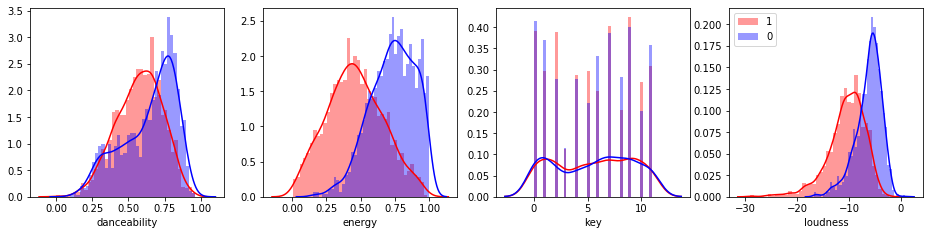

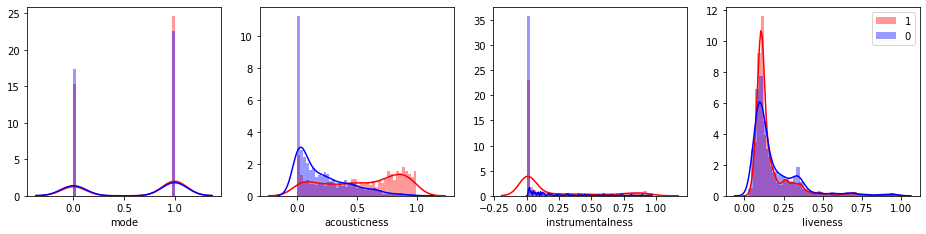

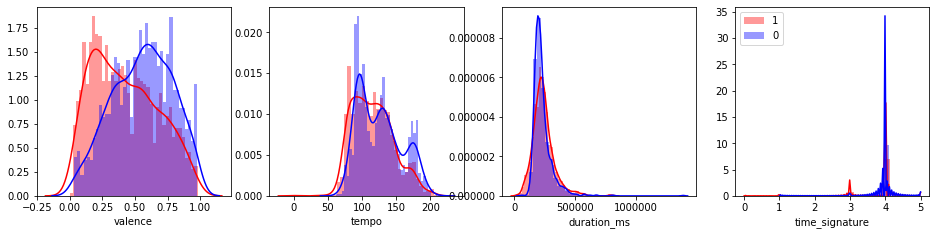

In [10]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['danceability'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['energy'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['key'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['loudness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['mode'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['acousticness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['liveness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))


plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['valence'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['tempo'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['time_signature'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

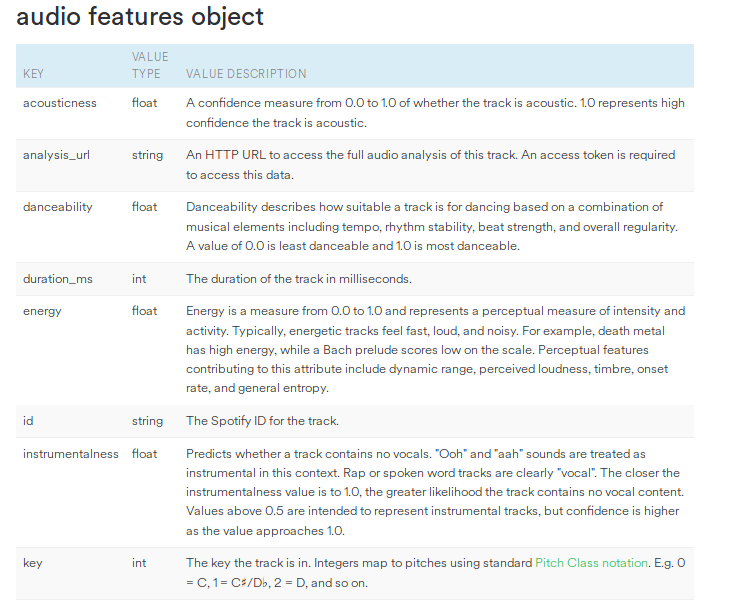

In [11]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(filename='../images/features.png')

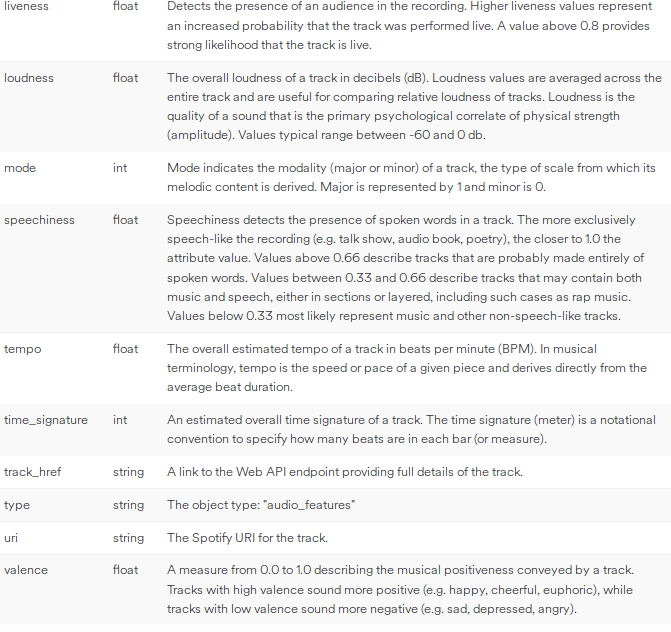

In [12]:
Image(filename='../images/features2.png')

## TEMPO. Simply put, how many beats per minute (BPM) does each song have?

Tempos are also related to different Genres

- Hip Hop	85–95 BPM
- Glitch Hop	105–115 BPM
- Techno	120–125 BPM
- House	& POP 115–130 BPM
- Electro	128 BPM
- Reggaeton >130 BPM
- Dubstep	140 BPM



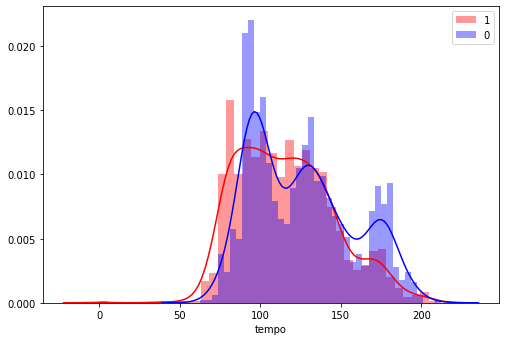

In [13]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['tempo'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['tempo'], color='blue', bins=40)
plt.legend((1,0))

#we see 3 picks for disliked songs:
#one between 90-110 -> prob pop
#125-140 --> sertanejo
#170-290 ---> Anitta, Reggaeton

In [14]:
data[data['Like']==0].sort_values("tempo", ascending = False).head(30)

id  \
1975  6MNGxu8MprKGkchUchkJsy   
2405  4MbJlBkNTEXGJ0sL8U5ABN   
2407  4lRvl2PMPqavdm4Q1qNV0M   
2641  190U8w42yxwiVqY8Tof8Dd   
1650  4sO6Ixf414qYGlGqMETzMF   
1400  6fkfMwMVgFJik4ljNMHGrB   
2454  2AjEKcRXkntPkujLXp6hGD   
2189  5t6z9HeNkHWVp0YiXIlSBQ   
2151  4GMQOjbWshf4Mzphkjg0DJ   
1969  5UE8e9VTMmv5fjGXLETjCf   
1543  7na7Bk98usp84FaOJFPv3d   
1654  7AlfoiKXfXzwVPE9asKNCs   
2161  1H32DaOTgHMtncpL3JzyF5   
2143  0SEd8AUWG3j4YFsFEVmGjW   
2131  4yCwQQHlvzZpjaHeIjD3uU   
1620  2wi1PzAsCczyseWIlxCvCK   
1696  7zwOSMqWghSCfZrVo5r5nR   
2085  0XIIRCazywV0esGSP1pVj5   
1622  2NxCWAnGWVawMHx7CErikq   
1608  6sYaS0lARqu6OX6QHf3kzY   
1718  0VsddQbaQeHyTKCeE4ZN4s   
1429  41VwdVXuOP08T3IBTRwyd2   
2071  0wVFtfUnFotGMSxPlG56a7   
1967  5Bn6W4bwH7Bw5nMvn8V4xF   
2663  31sUabnuTnFAM7rjMzKtfN   
1647  4VgYtXCVJ7IbWAZ5ryfvEQ   
1545  0vRPGvIiFaRwohogbqmzKx   
1394  1wdVy2FkA7uNymKdMG7RQR   
2419  31BIfWawTAEnp8KsAasy13   
1715  6TvNO32huOBlWG5o69i1v7   

                                                  title     main_artist  \
1975                                            Machika          Anitta   
2405                                 Armed To The Teeth     Annihilator   
2407                                  New Colossal Hate     Lamb of God   
2641                                        Ela Precisa  David Carreira   
1650                                             Ya Fue      Elias Diaz   
1400                                            Procura     Juan Miguel   
2454                                        Jinnslammer           Ignea   
2189                                   The Coming Curse      Iced Earth   
2151                                   Tornado Of Souls        Megadeth   
1969                                   Deixa ele sofrer          Anitta   
1543                                             Tattoo  Rauw Alejandro   
1654                                            Vamonos      Elias Diaz   
2161                                          Am I Evil    Diamond Head   
2143                              Hell Bent for Leather    Judas Priest   
2131                                       Neon Knights   Black Sabbath   
1620                                           Un Baile            Dest   
1696                                     Mala Costumbre  Jowell & Randy   
2085                                        A Fila Anda         Jimmy P   
1622                                Ahora Que Te Fuiste         Said P.   
1608               Se Cansó (with Darell & Kingz Daddy)     Kingz Daddy   
1718                  Tú Sabes (Navegantes Del Destino)     Mala Junt'a   
1429                                  Te Voy a Extrañar          Lyanno   
2071                                          Não Posso         Yasmine   
1967  Essa mina é louca (Participação especial de Jh...           Jhama   
2663                                           TRIBUNAL     benji price   
1647                                            Muévelo    Daddy Yankee   
1545                                        No Te Vayas   Alexis y Fido   
1394                                            La Mala           Jungl   
2419                                      Mindtraveller        Falconer   
1715                                       FRESH KERIAS   Sky Rompiendo   

      danceability  energy  key  loudness  mode  acousticness  \
1975         0.615   0.833    9    -3.377     1      0.052400   
2405         0.362   0.974    1    -4.481     0      0.000044   
2407         0.383   0.995    2    -3.222     1      0.000011   
2641         0.434   0.653    4    -8.454     0      0.350000   
1650         0.727   0.893    9    -2.675     0      0.184000   
1400         0.628   0.686    7    -7.266     1      0.157000   
2454         0.311   0.988    7    -3.397     1      0.000028   
2189         0.289   0.952    1    -7.740     0      0.000645   
2151         0.405   0.932    7   -11.151     1      0.002150   
1969         0.682   0.724    8    -4.449     0      0.05

In [15]:
data[data['Like']==1]['tempo'].mean() #Thanks Frank Ocean!! 

115.88303240391878

In [16]:
data[data['Like']==0]['tempo'].mean()

125.51177185185172

## ENERGY. Measure of intensity and activity

- This is the first of Spotify’s more subjective metrics. 

- Energy represents a perceptual measure of intensity and activity. 
- Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.


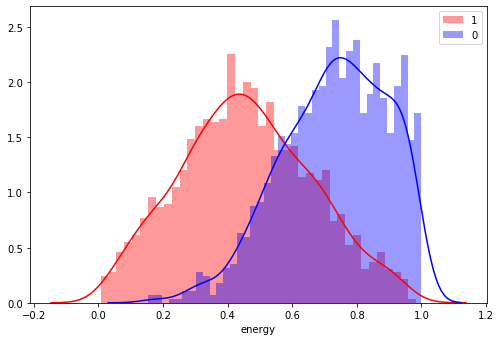

In [17]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['energy'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['energy'], color='blue', bins=40)
plt.legend((1,0))

(array([0, 1]), <a list of 2 Text xticklabel objects>)

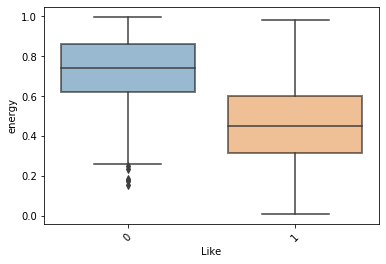

In [18]:
plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='Like', y='energy', data = data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [19]:
print(data[data['Like']==1]['energy'].mean()) 
print(data[data['Like']==0]['energy'].mean())

x = data[data['Like']==1]['energy']
y = data[data['Like']==0]['energy']

print(stats.ttest_ind(x,y)) #totally reject the H0 

#there are significant differences between the two groups on the ENERGY feature

0.45866599849284045
0.7311881481481493
Ttest_indResult(statistic=-38.16632375668159, pvalue=7.800175341433242e-255)


#### What artists are driving this ENERGY score on my liked songs?

In [54]:
high_energy = data[data['Like']==0].sort_values("energy", ascending = False).head(30)
high_energy

id                              title  \
1961  2loApP0kPaim0BTDVP9F26  Movimento da sanfoninha - Ao vivo   
2389  5FvOGIzAQuJyNaEM62mhIG                             Bomber   
2366  3dY6SLslpYq09BKeZxzVCC                Beneath the Remains   
2240  3orEDNYiGeafDlFNSAZ2Lw                         Inner Self   
2543  3TFTJUQq9aB2kRllk32dt5                Aguenta Te Com Esta   
2437  5tVnMxMP1UJmN93zTJ1o7E                     Win Hands Down   
2360  5wYKvMa5af6l3lXh1CXuIB                Suffer The Children   
2386  15DLl1r2zi07Ssq5RT1yT0                     Wait and Bleed   
2409  25Rdrp7aqTB3x3coVETp0N    It's A Raid (feat. Post Malone)   
2407  4lRvl2PMPqavdm4Q1qNV0M                  New Colossal Hate   
2250  2pj2VXKSBRTmV8nuiaCKd2                    Blinded By Fear   
2268  4Qfh5Q8BvLnz7IwhvCjKFz                  The Invisible Boy   
2364  1Ym7220l4W7Yz7Yt26rWSr                         Rapid Fire   
2337  2kW45RgvG6cGkyAfq9ZlsZ                Sacrificial Suicide   
2424  3jq0ula2HD54lHumVcEx8b                      Burning Times   
2562  37zHIdCcCWQ1EhNXZajuFU                      Coisinha Sexy   
2555  3uBgZA7uw5XLlKWXrzY2Qh                  Eu Sei, Tu És ...   
2406  1iVqb0ofDsEWkYotCej6eh              What The Dead Men Say   
2434  01PlEMEsHPNmGEzUGYXo7y                     Wings of Steel   
2310  0bxUaSy4x46Ogeio8khuBd                     Ten Ton Hammer   
2420  4N1TkZjFTiQb5aKJyVvqRk                All for the Kingdom   
2587  7t1mIXhUOU0xHxdd5Obz9B                    Chama O Antonio   
2430  6SvjyJTHQiE0hNtW8onMuR                    Death by Design   
2553  7w2OyKtdSbiRHMyfMiSIFP                      Morena Kuduro   
2374  6LhUsJiXAuxoalUz01evh0              Revolution Is My Name   
2122  6b6uLZsoGhObYexIxnRbIb        Hangar 18 - Remastered 2004   
2454  2AjEKcRXkntPkujLXp6hGD                        Jinnslammer   
2443  54Zpik1kydPmySK4dnQARZ              The Hammer of Witches   
2404  0upqZcB5Dq5xeIgYWol8Z4                     Fall to Ascend   
2188  42a6ALwfrBv9VgqZ7l7aNt                Birth Of The Wicked   

          main_artist  danceability  energy  key  loudness  mode  \
1961           Anitta         0.760   0.999    9    -4.007     1   
2389        Motörhead         0.355   0.998    3    -6.046     1   
2366        Sepultura         0.310   0.998    9    -5.236     0   
2240        Sepultura         0.275   0.997    4    -5.216     1   
2543              Toy         0.691   0.997   11    -5.053     1   
2437    Armored Saint         0.404   0.996   11    -2.878     1   
2360     Napalm Death         0.173   0.996    2    -9.367     1   
2386         Slipknot         0.382   0.996    7    -4.119     1   
2409      Post Malone         0.472   0.996    1    -0.578     1   
2407      Lamb of God         0.383   0.995    2    -3.222     1   
2250     At The Gates         0.247   0.995    7    -8.270     1   
2268         W.A.S.P.         0.254   0.994    3    -5.739     1   
2364     Judas Priest         0.375   0.994    2    -5.829     1   
2337          Deicide         0.315   0.993    4    -5.458     1   
2424       Iced Earth         0.536   0.993    3    -4.597     0   
2562     Ruth Marlene         0.703   0.992    7    -3.941     1   
2555       Santamaria         0.702   0.991    0    -4.415     0   
2406          Trivium         0.343   0.990    8    -4.069     1   
2434  Burning Witches         0.448   0.990    1    -3.044     0   
2310     Machine Head         0.282   0.990    4    -5.031     0   
2420     Grave Digger         0.515   0.989    7    -4.827     1   
2587              Toy         0.694   0.989    7    -4.030     1   
2430     Diamond Head         0.170   0.989    1    -3.333     1   
2553      José Malhoa         0.595   0.989   10    -3.724     1   
2374          Pantera         0.243   0.988    8    -3.485     1   
2122         Megadeth         0.248   0.988    2    -3.740     1   
2454            Ignea         0.311   0.988    7    -3.397     1   
2443         Sorcerer         0.366   0.988 

In [20]:
lower_energy = data[data['Like']==1].sort_values("energy").head(30)
lower_energy

id  \
143   769vrJXv69vVKlZjX9XJ4W   
68    4QwzVlAJSkcLeCNQ6Ug30P   
568   2rewrH6juNsrGRtkMbNKAe   
556   2TfNMJMvnILjmL8fSYlGAy   
875   59J9tAbY39foKp478aUsWX   
565   0u0IIYFZXtmtKTJilgOI3Z   
557   2uEgyXzyJBr5Iuvqc83d4N   
127   2ChIDG3Ae88OSrocGzjZzT   
132   73Uc6U9BTEFoGP5ywB6MLr   
19    4IhTXiZLKATmwhMZIb1GQN   
182   5zVME2t9iqUQWLiaADwyS2   
932   6it42Tpwq6vGNHpV3GTKIP   
924   6it42Tpwq6vGNHpV3GTKIP   
1052  3ZV87D1YcdCJhynXdTiqVu   
564   6ZbdcZO79W18dTwXf356Gp   
92    5rukCrVfbHZrQBh9E6qmmt   
830   1xF030urgdbtdHHOgwRGgy   
1069  2myQE9T8UAbl5u6Wg3UT2J   
382   4ibV0gdPQYoTqvBwckNRlP   
1324  2KNMqqNd3sLfeN4ukKduRT   
41    4m1KsLnr0vI8nntJnsrXTI   
491   6j9pCKVaJYNF7AdaNVTAaE   
406   7bcsnVCS4rCicgaLGlO371   
628   6eICehJWzcEk2880W6Apif   
586   5tyMJlMqaggzvuX7TtlrTe   
938   78v4aCN7ZgUFFxKGqaHCwA   
717   3yiXy2ydZP9ZpsYxvUI6sO   
634   2OLOQnVA7T76HdqhVKyNWC   
986   2UukB3C0jfVVcHLYlSVior   
139   2YItmEbRbOhAHevysQ1QLr   

                                                  title     main_artist  \
143                                Meet You In The Maze     James Blake   
68                               The touch of your lips      Chet Baker   
568                             I work for the Universe     Nick Murphy   
556                                           Blood And     Nick Murphy   
875   Satisfied Mind - Live at WFMU, East Orange, NJ...    Jeff Buckley   
565                                     Tongue (Lift 4)     Nick Murphy   
557                 And You Don’t Even Know You Hurt Me     Nick Murphy   
127                            Lullaby For My Insomniac     James Blake   
132                                      f.o.r.e.v.e.r.     James Blake   
19                                        Lights Are On   Tom Rosenthal   
182                                              Sister      Ben Howard   
932   Because It's Hard to Develop That Capacity on ...  Bruno Pernadas   
924   Because It's Hard to Develop That Capacity on ...  Bruno Pernadas   
1052                                                Ela   Tim Bernardes   
564                                   Blue Spotted Tail     Fleet Foxes   
92                                            Mané-Mané       B Fachada   
830                                     Summer All Over     Blake Mills   
1069                                         Intimidade      Caramelows   
382                                            deep fry       Expedidor   
1324                                         Moon River   Frank Sinatra   
41                                         Quem Me Dera     Valter Lobo   
491                                               White      John Mayer   
406                                              Marion        Bon Iver   
628                                              Marion        Bon Iver   
586                                           Love song    Lana Del Rey   
938                                               Intro  Bruno Pernadas   
717                                         Só Nós Dois   Tim Bernardes   
634                                           Last Year           alt-J   
986                                         5 Years Old          Letrux   
139                              The Colour In Anything     James Blake   

      danceability   energy  key  loudness  mode  acousticness  \
143          0.325  0.00722   10   -26.397     1         0.966   
68           0.478  0.00776   10   -24.986     1         0.983   
568          0.282  0.01030    2   -25.144     1         0.990   
556          0.273  0.01880    9   -28.400     1         0.989   
875          0.403  0.02750    9   -17.715     1         0.932   
565          0.154  0.02750    1   -18.428     1         0.988   
557          0.178  0.02900    5   -25.484     1         0.994   
127          0.318  0.02970   10   -16.581     1         0.957   
132          0.420  0.03750   10   -17.351     0         0.972   
19           0.440  0.04000    3   -16.887     

In [21]:
lower_energy['main_artist'].value_counts().head(10)

#Bon Iver
#Frank Ocean
#James Blake
#Nick Murphy fka Chet Faket
#Tim Bernardes, B Fachada 

James Blake       4
Nick Murphy       4
Bruno Pernadas    3
Bon Iver          2
Tim Bernardes     2
Blake Mills       1
Frank Sinatra     1
John Mayer        1
B Fachada         1
Caramelows        1
Name: main_artist, dtype: int64

#### Thank's Nick fka Chet Faker

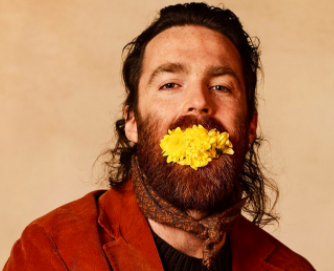

In [22]:
Image(filename='../images/Chet Faker.png')

## DANCEABILITY. 

###### According to the API documentation:
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

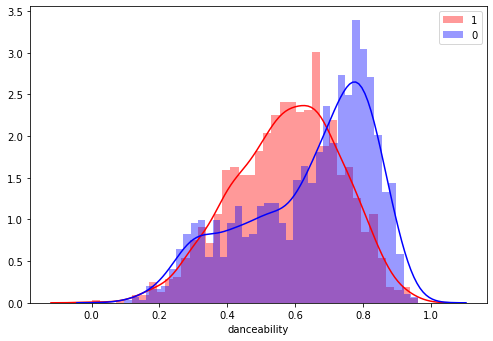

In [23]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['danceability'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['danceability'], color='blue', bins=40)
plt.legend((1,0))

Looks like while my 'disliked' songs follow a skewed distribution torwards higher levels of danceability, my loved songs follow a super normal distribution on this feature showing that I enjoy a wide range of danceability level

#### Songs with lowest danceability 

In [24]:
low_dance = data[data['Like']==1].sort_values(by="danceability").head(50)

In [25]:
low_dance['main_artist'].value_counts().head(10)

Nick Murphy         4
Bruno Pernadas      4
Lana Del Rey        4
James Blake         3
Tash Sultana        3
Ben Howard          3
Frank Ocean         2
B Fachada           2
Daniel Caesar       2
Sharon Van Etten    1
Name: main_artist, dtype: int64

##### The fault's on this beautiful album..... guess LDR doesn't wanna dance w/ me

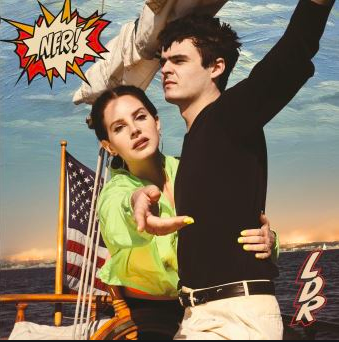

In [26]:
Image(filename='../images/LDR.png')

Spotify doesn’t give any further details as to the exact calculation behind ‘danceability’, but we can find a clue in comparing the two features

### ENERGY vs DANCEABILITY

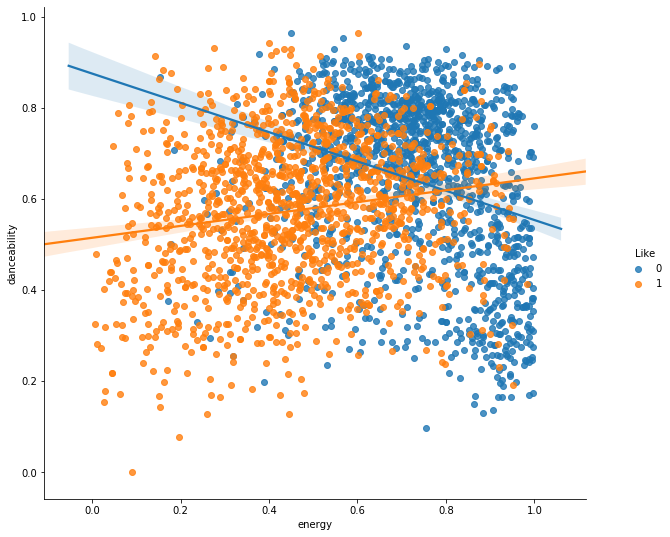

In [27]:
sns.lmplot(x="energy", y="danceability", data=data, hue='Like').fig.set_size_inches(10,8)

#from the graph below we can see that I do enjoy songs with normal level of dancability but low energy
#the imagine shows two very distinct clusters 

#### What is driving a High danceability but low Energy?

In [28]:
high_dance_lower_energy = data[data['Like']==1].sort_values(by="danceability", ascending=False).head(10)
high_dance_lower_energy

#Indie, lo-fi music

id                                           title  \
1230  6iHgkGwqtr5f4A6qMk0zdC                                 Tango In Harlem   
1134  0U1Bu9wLRAuNL00uYwubGp                                       Tranquilo   
42    3p5cvrXVxBN2ety8OB4luc                                         JOAQUIM   
1251  0SwAOdc4C2kWUMbsXG4ztz  Most Really Pretty Girls Have Pretty Ugly Feet   
1199  1g89nNWU8XIjUQwc8BNVTD      Am I a Girl? Am I a Boy? Do I Really Care?   
1036  0lI4NU85a2bxlPVfzjOuTc                                    Song For You   
1216  1eov6ZGStBvgaHBJvpMCsp                                      Caprichoso   
1286  5jS8H3e5ehSHgEfAYoxF2s                           Choses Qui Se Passent   
332   1fGf3wl2mFYauz09H7TSQr                               The Brazil I Want   
1287  3gCskbRL90fyXnTg6kNaUu                                          Nevada   

               main_artist  danceability  energy  key  loudness  mode  \
1230            Touch & Go         0.963   0.602    6   -14.037     1   
1134        Thalma Freitas         0.941   0.400   10   -10.977     1   
42                S. PEDRO         0.931   0.276    9   -13.045     1   
1251                  HNNY         0.929   0.449    1   -10.425     1   
1199  In Love With a Ghost         0.928   0.433    0   -12.604     1   
1036         Marbert Rocel         0.924   0.415    8   -13.764     1   
1216               V.Vizio         0.916   0.404    1   -10.326     1   
1286                matt.i         0.915   0.448    6    -7.182     0   
332                  O F F         0.914   0.515    1   -11.138     1   
1287           Kerala Dust         0.913   0.141    8   -14.659     1   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
1230        0.2640            0.3820    0.0885    0.765  131.080       205600   
1134        0.7730            0.0215    0.0800    0.878  120.715       259707   
42          0.4430            0.1680    0.0969    0.473  119.902       183133   
1251        0.0862            0.4900    0.0889    0.612  119.896       285440   
1199        0.5430            0.3230    0.0904    0.757  104.981        59481   
1036        0.1240            0.1710    0.0905    0.761  123.027       383840   
1216        0.4630            0.0000    0.1100    0.882  127.004       184274   
1286        0.1720            0.5580    0.1100    0.394   95.009       358679   
332         0.1990            0.8660    0.1030    0.918  129.884       110769   
1287        0.6150            0.9070    0.0840    0.364  108.017       363095   

      time_signature  Like  
1230               4     1  
1134               4     1  
42                 3     1  
1251               4     1  
1199               4     1  
1036               4     1  
1216               4     1  
1286               4     1  
332                4     1  
1287               4     1

## MODE. MAJOR OR MINOR

- Indicates the modality (major or minor) of a track.

- The type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


In [29]:
data.loc[data['mode']==1, :]['Like'].value_counts()

1    819
0    763
Name: Like, dtype: int64

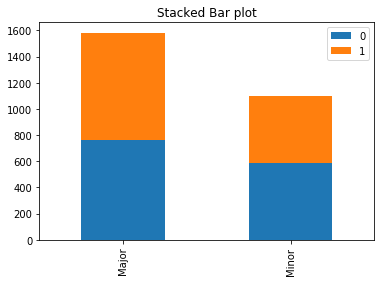

In [30]:
major = data.loc[data['mode']==1, :]['Like'].value_counts()
minor = data.loc[data['mode']==0, :]['Like'].value_counts()

df_plot  = pd.DataFrame([major,minor])
df_plot.index=['Major','Minor']

# Plot
df_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot');

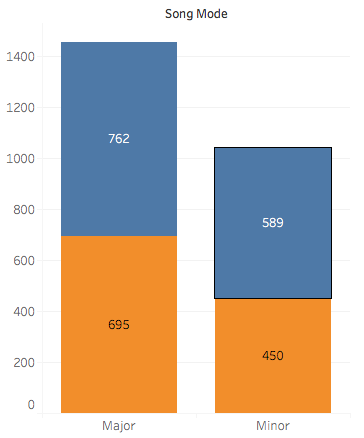

In [31]:
#no shame graph from Tableau
Image(filename='../images/graph_mode.png')

## KEY.

- The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . 
- E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [32]:
#count how many songs have non detected key

data[data['key'] ==-1]

#all songs have identified key! that's cool

Empty DataFrame
Columns: [id, title, main_artist, danceability, energy, key, loudness, mode, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, Like]
Index: []

##### Note one thing from the key description above: "0 = C, 1 = C♯/D♭, 2 = D" 

In [33]:
data.loc[data['key'] == 0, 'key_object'] = 'C'
data.loc[data['key'] == 1, 'key_object'] = 'C♯'
data.loc[data['key'] == 2, 'key_object'] = 'D'
data.loc[data['key'] == 3, 'key_object'] = 'D♯'
data.loc[data['key'] == 4, 'key_object'] = 'E'#Remember that E and B don't have#
data.loc[data['key'] == 5, 'key_object'] = 'F'
data.loc[data['key'] == 6, 'key_object'] = 'F♯'
data.loc[data['key'] == 7, 'key_object'] = 'G'
data.loc[data['key'] == 8, 'key_object'] = 'G♯'
data.loc[data['key'] == 9, 'key_object'] = 'A'
data.loc[data['key'] == 10, 'key_object'] = 'A♯'
data.loc[data['key'] == 11, 'key_object'] = 'B'

In [34]:
data.head()

id                 title        main_artist  \
0  0TLAptKgYxe7F0KewWH6X6  I Need A Forest Fire           Bon Iver   
1  2y0rHDTckWQ7of6tI1yc82            Naked Life         Oko Ebombo   
2  5nVE45ithgyVocZp5XLAk6     The Bug Collector  Haley Heynderickx   
3  66VuLX5s1nrZzzQqJqPbri            Simply Are       Arto Lindsay   
4  0X61Ud5Uzv44RvY3s1SsuO                Imogen        Nick Mulvey   

   danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.293   0.290    2   -11.596     1         0.696          0.875000   
1         0.624   0.321    0    -9.776     1         0.463          0.056000   
2         0.538   0.419   10    -9.705     1         0.777          0.329000   
3         0.682   0.694    7   -11.393     0         0.289          0.714000   
4         0.493   0.584    5    -6.894     1         0.850          0.000353   

   liveness  valence    tempo  duration_ms  time_signature  Like key_object  
0    0.1000   0.0373  128.276       257220               4     1          D  
1    0.1030   0.3040   73.996       255030               4     1          C  
2    0.0967   0.5290   99.622       228460               4     1         A♯  
3    0.0961   0.9540  173.851       224107               4     1          G  
4    0.1140   0.2340   86.909       255533               4     1          F

In [35]:
data['key_object'].unique()

array(['D', 'C', 'A♯', 'G', 'F', 'C♯', 'D♯', 'G♯', 'F♯', 'B', 'A', 'E'],
      dtype=object)

In [36]:
#export to use in tableau dashboard
data.to_csv (r'../data/my_data2.csv', index = False, header=True)

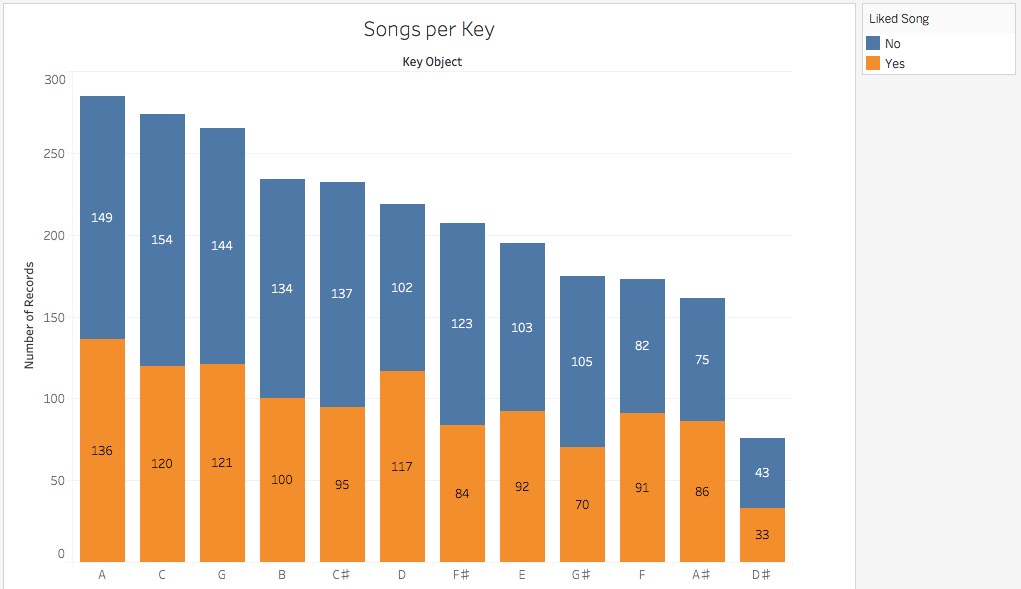

In [37]:
#graph from Tableau
Image(filename='../images/graph_keys.png')

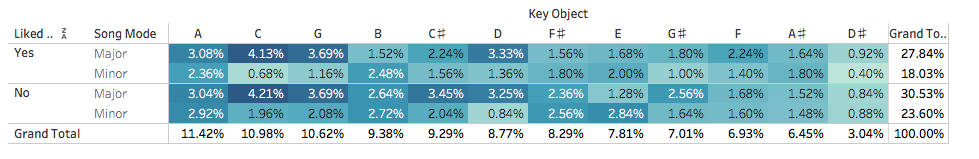

In [38]:
#graph from tableau: with MODE
Image(filename='../images/graph_keys2.png')

- We see that disliked songs have the highest share of Minor key sounds (at 24%). 
- Meanwhile, C major, C# major, and G and D major are especially common keys across both playlists.
- One interesting point is less of F# (major and minor) and E minor in my liked songs vs disliked

## ACOUSTICNESS.

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
- 1.0 represents high confidence the track is acoustic. 

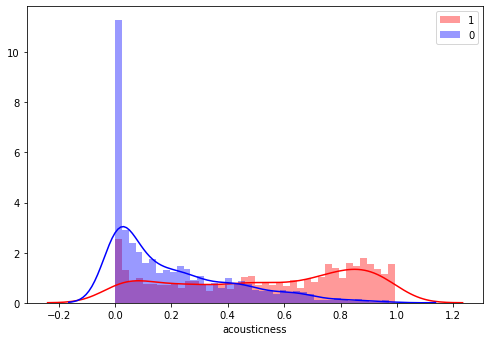

In [39]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['acousticness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['acousticness'], color='blue', bins=40)
plt.legend((1,0))

#there are a lot of disliked songs with 0 acousticness

In [53]:
data[data['Like']==1].sort_values(by="acousticness", ascending = False).head(50)

id  \
557   2uEgyXzyJBr5Iuvqc83d4N   
236   5PsGfCv1s5iEwEy27e2poj   
932   6it42Tpwq6vGNHpV3GTKIP   
924   6it42Tpwq6vGNHpV3GTKIP   
405   3g9mw4A8vdljOKgwrit88g   
568   2rewrH6juNsrGRtkMbNKAe   
853   0V5cvmTKsYmF5FmGGEAfmS   
556   2TfNMJMvnILjmL8fSYlGAy   
938   78v4aCN7ZgUFFxKGqaHCwA   
63    09JRFc5o6X3UsQzoF5ICqg   
565   0u0IIYFZXtmtKTJilgOI3Z   
425   0YcAWPUwih5MrIlD90oiNu   
235   5Cfz0DCrcFpISyvDHBWy9f   
636   4tAroWdVxOsx5teIaZqEHm   
272   0boSS6hbM9vZRCDrQ5QRHB   
1094  6L3VsjOK656g3MEqckfVzA   
182   5zVME2t9iqUQWLiaADwyS2   
89    0eac7pxelDpTeY71oJCdRz   
68    4QwzVlAJSkcLeCNQ6Ug30P   
426   7oRNU7Tmek0nm2lqyDojoG   
625   3Y4rUyw7XBCK6hGHCOt6rp   
468   72794Eag03xdy7TO0KNuid   
277   2opxMKF8FH55z4NIx5zcL5   
292   6Eite6Eq57lsV4eJlRk1KS   
731   0zGQ0FAGQC6O8GFJzJwvof   
19    4IhTXiZLKATmwhMZIb1GQN   
227   7c1mJwugEp6fUU1GH4Vywi   
139   2YItmEbRbOhAHevysQ1QLr   
1313  0v3PdoLZrm0RVfS8sHnADp   
403   1RuyGO0kmkNkfixUFKkjuC   
854   0vfjkdOLTqjiYrWrkW61ZS   
56    5I6y1KWmUoV5YCaIEcs1qs   
417   4HEqM4RSvXQAXqSdqqD8qE   
955   2wVrDSnhFnwy9SQLgP9Yiq   
450   2lvE8rI37yn0QoPypqm3T3   
1028  4Ya86EBF11qAYI7T5xVm08   
1126  3ayXpx9lRshJWuaIZGkzsZ   
629   7BdtdBfrIufJOOCdA0CeJC   
964   1O0oZqPv8gGIFglSAiiBp5   
1003  3OF9rTCYjLEplmYMynYvHG   
885   4ZxwDolsWtH4pf7J0oZhT1   
879   04WCagzGGqbRGPfiA4wA96   
483   1BViPjTT585XAhkUUrkts0   
611   44JxL1qNXXQYniZ5T3MUs9   
391   4JZ2WRVylFk8afoGcYDYQ3   
505   5oK98mpTJSU0iqLHN1hZ3y   
132   73Uc6U9BTEFoGP5ywB6MLr   
400   4VZM71F8XAoLRuNyNLxwWS   
152   0BCAtiPr3fBKqfEWaUmCUh   
895   41TDCIv65ne6WSZCAfOPQ6   

                                                  title  \
557                 And You Don’t Even Know You Hurt Me   
236                                       Cardigan Song   
932   Because It's Hard to Develop That Capacity on ...   
924   Because It's Hard to Develop That Capacity on ...   
405                                               Wash.   
568                             I work for the Universe   
853                            Je te laisserai des mots   
556                                           Blood And   
938                                               Intro   
63                                           Serotonina   
565                                     Tongue (Lift 4)   
425                    Bruised Orange (Chain of Sorrow)   
235                                   Les rues de Paris   
636                                       Plastic Taste   
272                                          Blue Train   
1094                               Todo Homem - Ao Vivo   
182                                              Sister   
89                                   Barriga pelo Amigo   
68                               The touch of your lips   
426                                          Beach Baby   
625                         Call It Fate, Call It Karma   
468                         Cayendo (Side A - Acoustic)   
277                                               Galgo   
292                                              Janela   
731                                            Il neige   
19                                        Lights Are On   
227                                           Baby Blue   
139                              The Colour In Anything   
1313                                            Jelmore   
403                                           Re:Stacks   
854                                              Gondry   
56                             Should Have Known Better   
417     22 (OVER S∞∞N) - Bob Moose Extended Cab Version   
955                                                Ohio   
450                                      In the Morning   
1028                                 If You Had My Love   
1126                                       Que Nem Kalu   
629                                       00000 Million   
964                 If You Look at the Picture Too Long   
1003                     Night an

## VALENCE.

This is one of the most interesting metrics that Spotify produces: A measure describing the musical positiveness conveyed by a track. 
- Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric)
- tracks with low valence sound more negative (e.g. sad, depressed, angry).

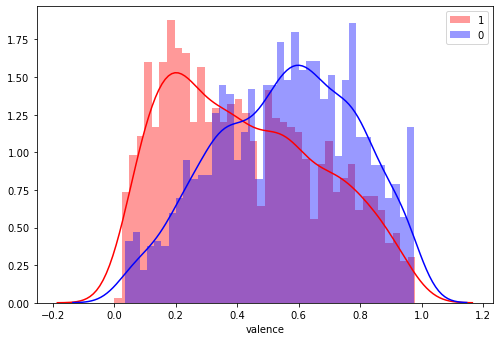

In [40]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['valence'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['valence'], color='blue', bins=40)
plt.legend((1,0))

# This graph is showing that I strongly prefer sad songs rather than happy ones.

#### Let's check what's driving this result

In [41]:
sad = data[data['Like']==1].sort_values(by="valence").head(50)

In [42]:
sad['main_artist'].value_counts().head(10) #I was ecpecting this.... thanks LDR again

Ben Howard        5
James Blake       4
Lana Del Rey      4
Bon Iver          3
Bruno Pernadas    3
B Fachada         2
alt-J             2
DRAMA             1
Tom Veloso        1
rei brown         1
Name: main_artist, dtype: int64

### Valence vs Danceability

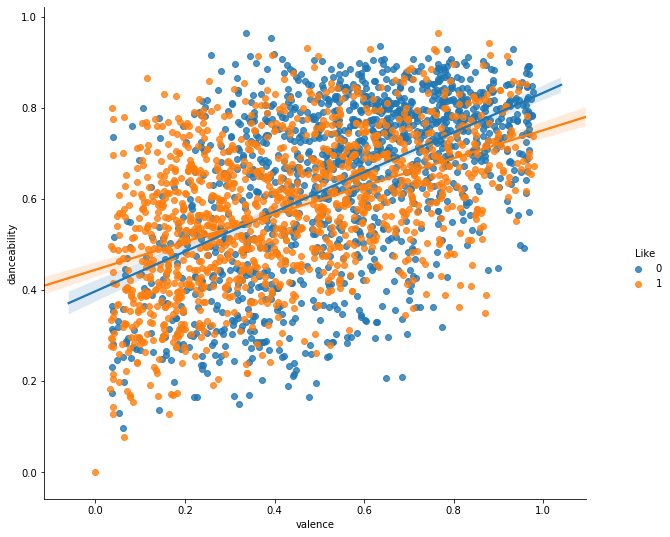

In [43]:
sns.lmplot(x="valence", y="danceability", data=data, hue='Like').fig.set_size_inches(10,8)

#hard to check a cluster from disliked to liked songs 
#but we an see relationship between valence and danceability: the happier the song the better to dance 

## LOUDNESS.The overall loudness of a track in decibels (dB). 

Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


#### Fyi. Did you know? Spotify adjusts loudness.

When Spotify receives the audio file, they transcode it to delivery formats Ogg/Vorbis and AAC. 
At the same time, they calculate the loudness level and store that information as metadata in the transcoded formats of the track.

https://artists.spotify.com/faq/mastering-and-loudness#how-does-spotify-calculate-loudness

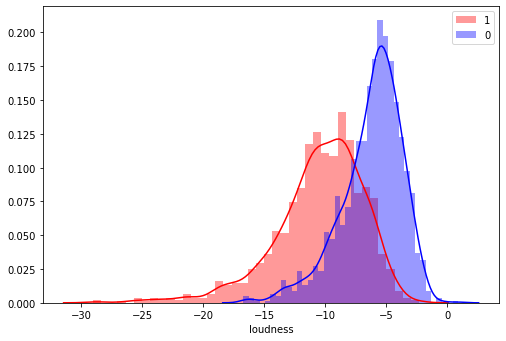

In [44]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['loudness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

#As I was expecting my liked songs distribution is placed on a lower level of loudness vs disliked songs

## INSTRUMENTALNESS.


- Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. - - Rap or spoken word tracks are clearly “vocal”. 
- The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
- Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

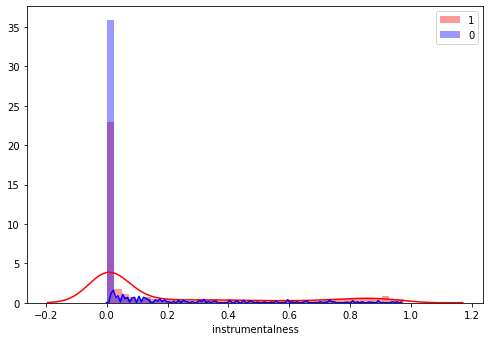

In [45]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.legend((1,0))

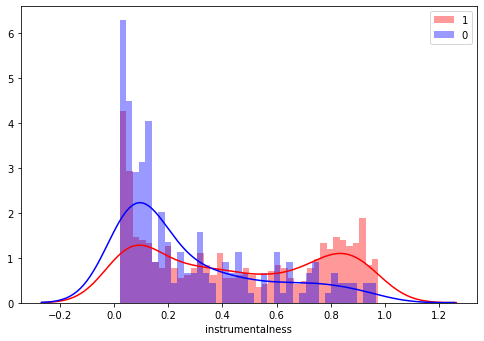

In [46]:
data_test = data[data['instrumentalness']>0.02]

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data_test[data_test['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data_test[data_test['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.legend((1,0))

(array([0, 1]), <a list of 2 Text xticklabel objects>)

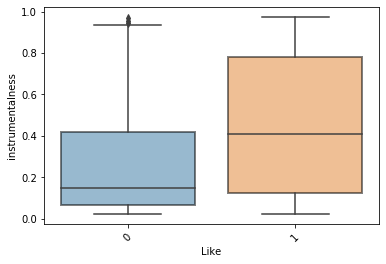

In [47]:
#even using data_test with only songs over 0.02 of instrumentalness level, we can see that my liked songs have 
#a significantly higher level of instruments present in the song, higher likelihood of tracks
#contains no vocal content --> this is also probably due to Lo-Fi songs

plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='Like', y='instrumentalness', data = data_test)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

## LIVENESS. LIVE MUSIC?

- Detects the presence of an audience in the recording. 
- Higher liveness values represent an increased probability that the track was performed live. 
- A value above 0.8 provides strong likelihood that the track is live. 

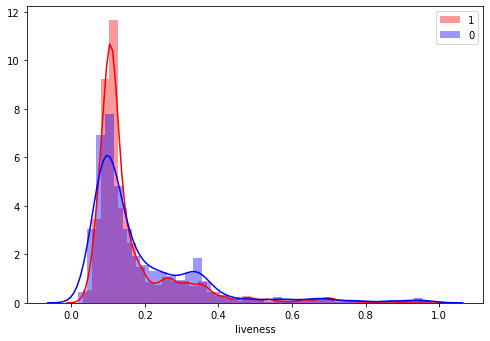

In [48]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['liveness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))

#liked songs more concentrated on not live recorded songs

### One Song: 3 different versions

In [49]:
data[data['title'] == 'Moon River']

id       title    main_artist  danceability  energy  \
475   41cpvQ2GyGb2BRdIRSsTqK  Moon River    Frank Ocean         0.240  0.1160   
630   1IRRqn75jaZHp7zMT1NGbZ  Moon River  Jacob Collier         0.144  0.1540   
1324  2KNMqqNd3sLfeN4ukKduRT  Moon River  Frank Sinatra         0.171  0.0632   

      key  loudness  mode  acousticness  instrumentalness  liveness  valence  \
475     0   -13.216     1         0.877          0.000920     0.100   0.0937   
630    10   -12.596     1         0.970          0.028400     0.103   0.0400   
1324    0   -20.776     1         0.945          0.000027     0.121   0.1680   

       tempo  duration_ms  time_signature  Like key_object  
475   77.349       188324               3     1          C  
630   85.391       496880               4     1         A♯  
1324  81.406       199133               3     1          C

- While Frank (Sinatra)'s version holds the lower energy level is also the one with highest danceability, liveness and valence
- Both Ocean and Sinatra produce the song in C as major while Jacob plays in A#. He also plays in a faster tempo
